# HR Attrition Case Study (with Hypothesis)

In [4]:
# Import packages

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading the Data

In [6]:
df=pd.read_csv('general_data.csv') 
df.head() .T

,0,1,2,3,4
Age,51,31,32,38,32
Attrition,No,Yes,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Frequently,Non-Travel,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,6,10,17,2,10
Education,2,1,4,5,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeID,1,2,3,4,5
Gender,Female,Female,Male,Male,Male


# Features of the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

There are 4410 rows and 24 columns

In [8]:
df.shape

(4410, 24)

In [9]:
df.describe().T # Transposing the data for better clarity

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Cleaning the Data

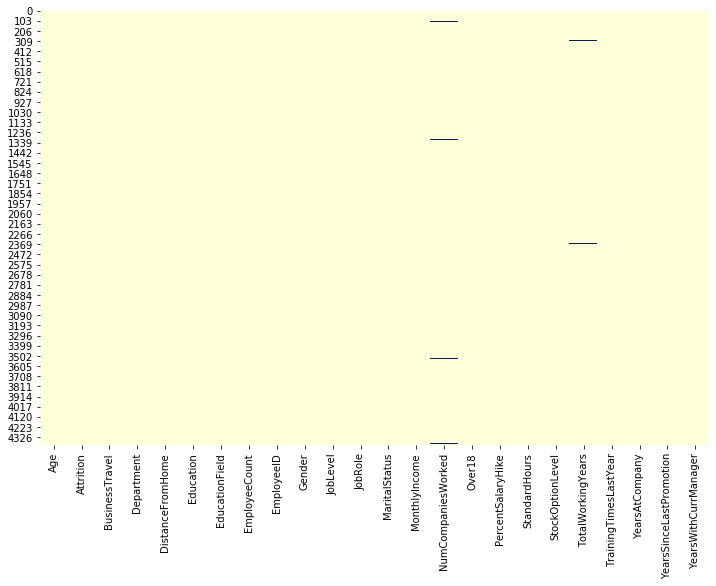

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=False,cmap="YlGnBu");

In [12]:
df.isnull().sum().sort_values(ascending=False)

NumCompaniesWorked         19
TotalWorkingYears           9
YearsWithCurrManager        0
JobLevel                    0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobRole                     0
YearsSinceLastPromotion     0
MaritalStatus               0
MonthlyIncome               0
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TrainingTimesLastYear       0
YearsAtCompany              0
Age                         0
dtype: int64

#### We can see that `NumCompaniesWorked` and `TotalWorkingYears` have missing values.

We would handle the missing values by replacing them with the last valid observation value of each column before the missing item

In [13]:
cols_na = ["NumCompaniesWorked","TotalWorkingYears"]

#### Below are the columns with missing values

In [14]:
df_na = df[df.isnull().any(axis=1)][cols_na]
df_na.index

Int64Index([  23,  115,  137,  210,  308,  343,  476,  574,  647,  799,  932,
            1103, 1312, 1517, 1521, 1711, 1996, 2365, 2367, 2696, 3063, 3120,
            3533, 3818, 3910, 4226, 4395, 4409],
           dtype='int64')

In [15]:
df.fillna(method='ffill', inplace=True) 

In [16]:
df[cols_na].iloc[df_na.index]

,NumCompaniesWorked,TotalWorkingYears
23,1.0,21.0
115,9.0,5.0
137,7.0,13.0
210,1.0,18.0
308,4.0,2.0
343,1.0,10.0
476,1.0,4.0
574,7.0,2.0
647,6.0,9.0
799,3.0,7.0


We check further on the counts using describe to see if counts are same for all columns or not :

In [17]:
df.describe().transpose()['count'].sort_values()

Age                        4410.0
DistanceFromHome           4410.0
Education                  4410.0
EmployeeCount              4410.0
EmployeeID                 4410.0
JobLevel                   4410.0
MonthlyIncome              4410.0
NumCompaniesWorked         4410.0
PercentSalaryHike          4410.0
StandardHours              4410.0
StockOptionLevel           4410.0
TotalWorkingYears          4410.0
TrainingTimesLastYear      4410.0
YearsAtCompany             4410.0
YearsSinceLastPromotion    4410.0
YearsWithCurrManager       4410.0
Name: count, dtype: float64

We can see now that there are no more missing values. <br> Now we will check if there are any duplicate rows - if yes those rows need to be removed.

In [18]:
df.duplicated().any()

False

# Univariate Analysis

## Attrition distribution

In [36]:
df['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [37]:
attrition_percent = df['Attrition'].value_counts()/df['Attrition'].count()

In [38]:
attrition_percent

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

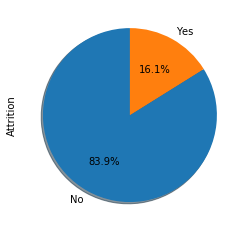

In [41]:
df['Attrition'].value_counts().plot(kind='pie', autopct = "%1.1f%%",shadow=True, startangle=90)

### We can see that in the dataset 16.1% employees attrited and rest did not.

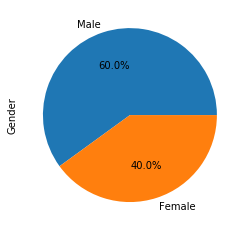

In [47]:
df['Gender'].value_counts().plot(kind='pie', autopct = "%1.1f%%");

### In the dataset : There are total 60% male employees and 40% female employees


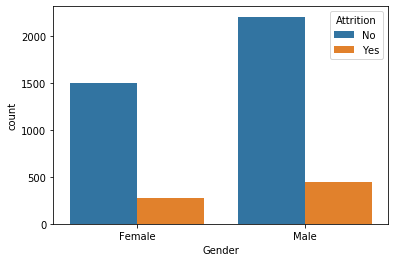

In [49]:
sns.countplot(x='Gender', hue='Attrition',data=df );

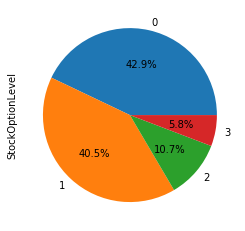

In [51]:
df['StockOptionLevel'].value_counts().plot(kind='pie', autopct = "%1.1f%%");

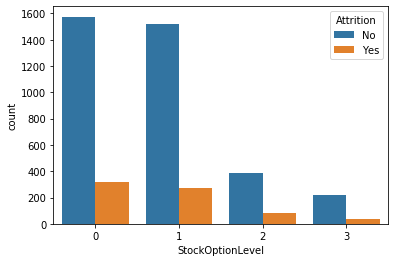

In [53]:
sns.countplot(x='StockOptionLevel', hue='Attrition', data=df);

#### It can be seen that attrition is high is StockOptionLevel is less than 2.

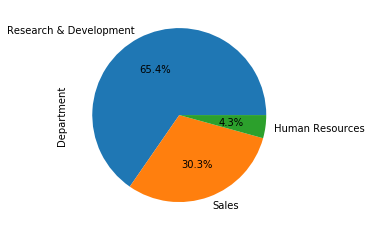

In [59]:
df['Department'].value_counts().plot(kind='pie', autopct = "%1.1f%%");

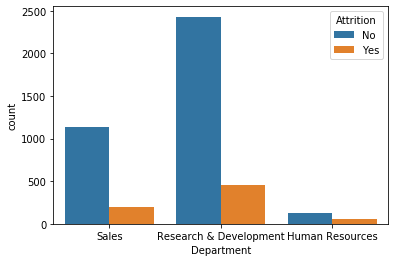

In [60]:
sns.countplot(x='Department', hue='Attrition', data=df);

#### The employee from Research & Development Department have higher attrition rate compared to other departments.

##### Select columns and analyze
<br> Select columns that have non-categorical and non-ordinal data like - <br> 'Age','DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager'
 

In [19]:
uni_cols = ['Age','DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']

In [20]:
df_desc=df[uni_cols].describe() 
df_desc = df_desc.transpose()
df_desc['IQR'] = df_desc['75%'] - df_desc['25%']
df_desc

,count,mean,std,min,25%,50%,75%,max,IQR
Age,4410.0,36.923810,9.133301,18.0,30.0,36.0,43.0,60.0,13.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.0,7.0,14.0,29.0,12.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.0,49190.0,83800.0,199990.0,54690.0
NumCompaniesWorked,4410.0,2.693197,2.499167,0.0,1.0,2.0,4.0,9.0,3.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.0,14.0,18.0,25.0,6.0
TotalWorkingYears,4410.0,11.285261,7.787073,0.0,6.0,10.0,15.0,40.0,9.0
TrainingTimesLastYear,4410.0,2.799320,1.288978,0.0,2.0,3.0,3.0,6.0,1.0
YearsAtCompany,4410.0,7.008163,6.125135,0.0,3.0,5.0,9.0,40.0,6.0
YearsSinceLastPromotion,4410.0,2.187755,3.221699,0.0,0.0,1.0,3.0,15.0,3.0
YearsWithCurrManager,4410.0,4.123129,3.567327,0.0,2.0,3.0,7.0,17.0,5.0


#### Now below we choose only those cases where the `Attrition` = Yes

In [21]:
df_desc_yes=df[df['Attrition'] == 'Yes'][uni_cols].describe() 
df_desc_yes = df_desc_yes.transpose()
df_desc_yes['IQR'] = df_desc_yes['75%'] - df_desc_yes['25%']
df_desc_yes

,count,mean,std,min,25%,50%,75%,max,IQR
Age,711.0,33.607595,9.675693,18.0,28.0,32.0,39.0,58.0,11.0
DistanceFromHome,711.0,9.012658,7.772368,1.0,2.0,7.0,15.0,29.0,13.0
MonthlyIncome,711.0,61682.616034,44792.067695,10090.0,28440.0,49080.0,71040.0,198590.0,42600.0
NumCompaniesWorked,711.0,2.931083,2.674771,0.0,1.0,1.0,5.0,9.0,4.0
PercentSalaryHike,711.0,15.481013,3.775289,11.0,12.0,14.0,18.0,25.0,6.0
TotalWorkingYears,711.0,8.272855,7.192236,0.0,3.0,7.0,10.0,40.0,7.0
TrainingTimesLastYear,711.0,2.654008,1.154834,0.0,2.0,3.0,3.0,6.0,1.0
YearsAtCompany,711.0,5.130802,5.941598,0.0,1.0,3.0,7.0,40.0,6.0
YearsSinceLastPromotion,711.0,1.945148,3.148633,0.0,0.0,1.0,2.0,15.0,2.0
YearsWithCurrManager,711.0,2.852321,3.138918,0.0,0.0,2.0,5.0,14.0,5.0


#####  - It can be noted above that we calculate the Inter Quartile range and see that attrition is among a wide range of salary ~ 42K
#####  - Also, it can be seen that the mean salary who attrited is ~61k

### Median

In [22]:
# We check median values for all columns

df_med=df[uni_cols].median()
df_med

Age                           36.0
DistanceFromHome               7.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [23]:
# We check median values for Attrition = Yes
df_med_yes=df[df['Attrition'] == 'Yes'][uni_cols].median()
df_med_yes

Age                           32.0
DistanceFromHome               7.0
MonthlyIncome              49080.0
NumCompaniesWorked             1.0
PercentSalaryHike             14.0
TotalWorkingYears              7.0
TrainingTimesLastYear          3.0
YearsAtCompany                 3.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           2.0
dtype: float64

In [24]:
# We check median values for Attrition = No
df_med_no=df[df['Attrition'] == 'No'][uni_cols].median()
df_med_no

Age                           36.0
DistanceFromHome               7.0
MonthlyIncome              49300.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 6.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

### Mode

In [25]:
df_mode=df[uni_cols].mode()
df_mode.transpose()

,0
Age,35.0
DistanceFromHome,2.0
MonthlyIncome,23420.0
NumCompaniesWorked,1.0
PercentSalaryHike,11.0
TotalWorkingYears,10.0
TrainingTimesLastYear,2.0
YearsAtCompany,5.0
YearsSinceLastPromotion,0.0
YearsWithCurrManager,2.0


In [26]:
# We check median values for Attrition = Yes
df_mode_yes=df[df['Attrition'] == 'Yes'][uni_cols].mode()
df_mode_yes.transpose().iloc[:,0]


Age                           29.0
DistanceFromHome               2.0
MonthlyIncome              25590.0
NumCompaniesWorked             1.0
PercentSalaryHike             13.0
TotalWorkingYears              1.0
TrainingTimesLastYear          2.0
YearsAtCompany                 1.0
YearsSinceLastPromotion        0.0
YearsWithCurrManager           0.0
Name: 0, dtype: float64

##### We can see that most employees are leaving at age of 29 and who have a `PercentSalaryHike` (13) lower than median (14)

### Variance

In [27]:
df_var=df[uni_cols].var().sort_values()
df_var

TrainingTimesLastYear      1.661465e+00
NumCompaniesWorked         6.245837e+00
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
PercentSalaryHike          1.338907e+01
YearsAtCompany             3.751728e+01
TotalWorkingYears          6.063850e+01
DistanceFromHome           6.569144e+01
Age                        8.341719e+01
MonthlyIncome              2.215480e+09
dtype: float64

### Skewness

In [28]:
df_skew=df[uni_cols].skew().sort_values()
df_skew

Age                        0.413005
TrainingTimesLastYear      0.552748
PercentSalaryHike          0.820569
YearsWithCurrManager       0.832884
DistanceFromHome           0.957466
NumCompaniesWorked         1.029043
TotalWorkingYears          1.113861
MonthlyIncome              1.368884
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
dtype: float64

### Kurtosis

In [29]:
df_kurt = df[uni_cols].kurt().sort_values()
df_kurt

Age                       -0.405951
PercentSalaryHike         -0.302638
DistanceFromHome          -0.227045
NumCompaniesWorked         0.011277
YearsWithCurrManager       0.167949
TrainingTimesLastYear      0.491149
TotalWorkingYears          0.901566
MonthlyIncome              1.000232
YearsSinceLastPromotion    3.601761
YearsAtCompany             3.923864
dtype: float64

# Inference 

- It can be noted above that we calculate the Inter Quartile range and see that attrition is among a wide range of salary ~ 42K

- All the above variables show positive skewness; while Age & Mean_distance_from_home are leptokurtic and all other variables are platykurtic.

- We can see that most employees are leaving at age of 29 and who have a PercentSalaryHike (13) lower than median (14)

- Mean age forms a near normal distribution with 13 years of IQR fo the overall sample and of 11 years of IQR for those attrited


# Further Outliers Check

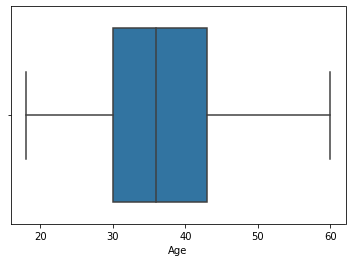

In [30]:
box_plot=df.Age 
sns.boxplot(box_plot);

##### Age is normally distributed without any outliers 

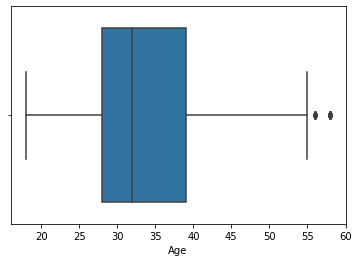

In [31]:
box_plot_attrited = df[df['Attrition'] == 'Yes'].Age
sns.boxplot(box_plot_attrited);

##### Age of attrited is right skewed & few outliers are there between 55 to 60. We can see same depicted in the distribution plot below.


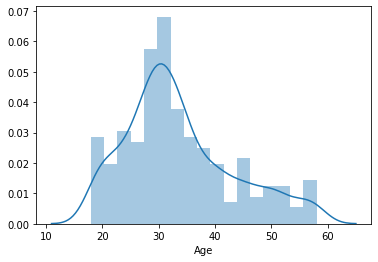

In [44]:
sns.distplot(df[df['Attrition'] == 'Yes'].Age);

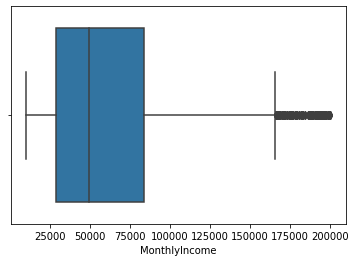

In [32]:
box_plot=df.MonthlyIncome 
sns.boxplot(box_plot);

##### Monthly Income is Right skewed with several outliers 

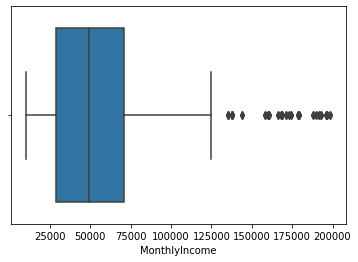

In [33]:
box_plot_attrited = df[df['Attrition'] == 'Yes'].MonthlyIncome
sns.boxplot(box_plot_attrited);

##### Monthly income of attrited individuals look normally distributed - but there are outliers showing many individuals with high salary leaving the company

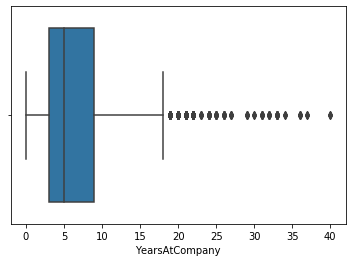

In [34]:
box_plot=df.YearsAtCompany 
sns.boxplot(box_plot);

##### Years at company is also Right Skewed with several outliers observed. 

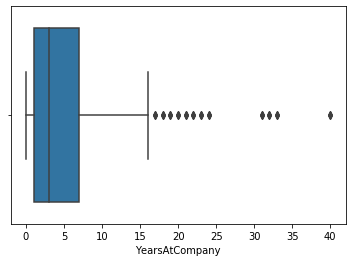

In [35]:
box_plot_attrited = df[df['Attrition'] == 'Yes'].YearsAtCompany
sns.boxplot(box_plot_attrited);

##### Even for attrited employees the distribution of Years at company is rightly skewed and with several outliers

<br>

<br>

# HYPOTHESIS

### **Hypothesis 1:** <br>
The mean age of the employees who left the company is less than or equal to 32<br>

H0: $mu$ $<=$ 32 <br>
H1: $mu$ $>$ 32

### **Hypothesis 2:**<br>

The mean of employees who spent with their current manager is less than 3 years<br><br>
H0: $mu$ $<=$ 3 <br>
H1: $mu$ $>$ 3

### **Hypothesis 3:** <br>

The mean of total working years of employees who stayed in company is more than 10 years<br>

H0: $mu$ $>=$ 10 <br>
H1: $mu$ $<$ 10

### **Hypothesis 4:** <br>
The male employee have high attrition rate than female employees
- Ho : μa > μb (Null Hypothesis where a denotes male employee and b denotes female employee)
- H1 : μa < μb (Alternative Hypothesis)


### **Hypothesis 5** <br>

The mean of of employees with years since last promotion who has left the company is less than 2years.<br>

H0: $mu$ $<=$ 2 <br>
H1: $mu$ $>$ 2

### **Hypothesis 6** <br>

The mean monthly income of employees who has left the company is 61,000.<br>

H0: $mu$ $=$ 61,000 <br>
H1: $mu$ $!=$ 61,000

### **Hypothesis 7** <br>

The mean number of companies worked of employees who stayed in company is less than 2<br>

H0: μ<= 2 <br>
H1: μ > 2

### **Hypothesis 8** <br>

The employee who works in Research & Development Department have high attrition rate than who works in Sales Department
-    Ho : μa >= μb (Null Hypothesis where a is Employee in Research & Development Department , b is Employee works in Sales Department )
-    H1 : μa < μb (Alternative Hypothesis)


### **Hypothesis 9** <br>
The mean education of employess who stayed in the company XYZ are having bachelor's degree(Level=3)

H0: $mu$ $=$ 3 <br>
H1: $mu$ $!=$ 3

### **Hypothesis 10** <br>
The mean training time of employees who left the company XYZ is less than 2 years

H0: $mu$ $<=$ 3 <br>
H1: $mu$ $>$ 3